In [1]:
# Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing warnings
import warnings
warnings.filterwarnings('ignore')
import statistics

In [2]:
# Loading the dataset

df=pd.read_csv('census_index_1994.csv', skipinitialspace=True)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
# Checking for null values.
df.isnull().values.any()

False

Observation: Here we see there are no null values but there is a '?' present in the dataset

In [5]:
# Checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Replacing the question mark with NaN
df=df.replace('?',np.nan)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
#Checking for null values again.
df.isnull().values.any()

True

In [8]:
# Checking for null values.
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

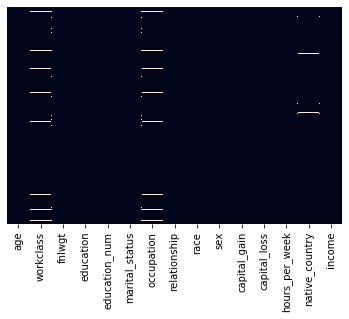

In [9]:
# Checking null values via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
# Checking the information of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
# Imputing the missing value with mode.

for col in ['workclass','occupation','native_country']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [12]:
# Now again checking for missing values.
df.isnull().values.any()

False

# Now our null values is removed. We can see it via visualization.

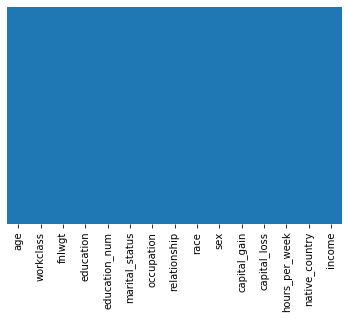

In [13]:
# Now again checking null values via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20')
plt.show()

# Now our data is ready for Visualization without any missing values.

In [14]:
# Putting the data into Pandas DataFrame
df_income=pd.DataFrame(df)
df_income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
#Checking the various columns.
df_income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [16]:
#Checking the data types of the columns
df_income.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

# For analyzing the data with target i.e., income we have to change income into numeric type.

In [17]:
# Changing the data type of target column.
df_income['income']=df_income['income'].map({'<=50K': 0, '>50K':1})
df_income['income'].dtypes

dtype('int64')

In [18]:
df_income['income'].unique()

array([0, 1], dtype=int64)

Observation: Here 1 stands for greater than 50K and 0 stands for less than or equal to 50K

# Summary Statistics

In [20]:
df_income.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


# Exploring Data Variables

In [21]:
# Printing the object data types and their unique values

for column in df_income.columns:
    if df_income[column].dtype==object:
        print(str(column)+':'+str(df_income[column].unique()))
        print(df_income[column].value_counts())
        print('********************************************************')
        print('\n')

workclass:['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
********************************************************


education:['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
****************

From above, we can see the summary of the categorical columns.

# Checking the correlation between columns

In [22]:
df_cor=df_income.corr()
df_cor

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


Here we can see the correlation between the columns.
For better understanding we can see it via visualization(with the help of heatmap)

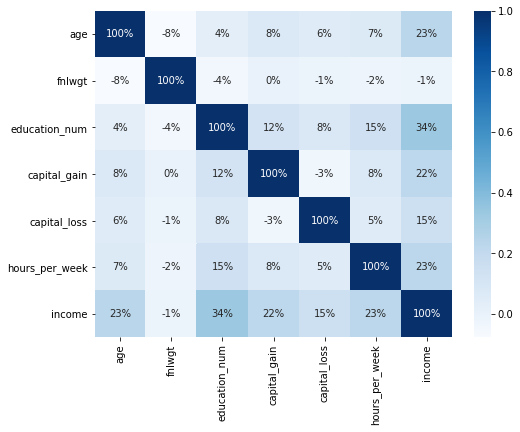

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='Blues')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

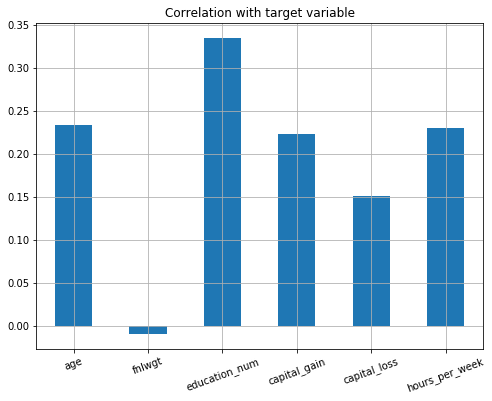

In [24]:
plt.figure(figsize=(8,6))
df_income.drop('income',axis=1).corrwith(df_income['income']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target variable")

# Data Visualization

Our feature variable of interest is income.

It refers to the monthly income of the people.

We already changed it into integer value as it contains only two nos. 0 and 1.

1 stands for greater than 50K

0 stands for less than or equal to 50K

# Univariate Analysis

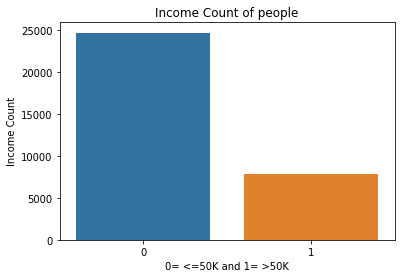

0    24720
1     7841
Name: income, dtype: int64


In [26]:
# Checking income count of people.
plt.subplots(figsize=(6,4))
sns.countplot(x='income',data=df_income)
plt.title("Income Count of people")
plt.xlabel('0= <=50K and 1= >50K')
plt.ylabel("Income Count")
plt.show()

print(df_income.income.value_counts())

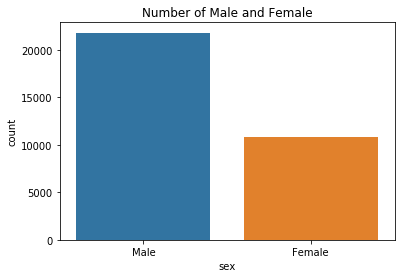

Male      21790
Female    10771
Name: sex, dtype: int64


In [27]:
# Checking number of male and female.
plt.subplots(figsize=(6,4))
sns.countplot(x='sex',data=df_income)
plt.title("Number of Male and Female")
plt.show()

print(df_income.sex.value_counts())

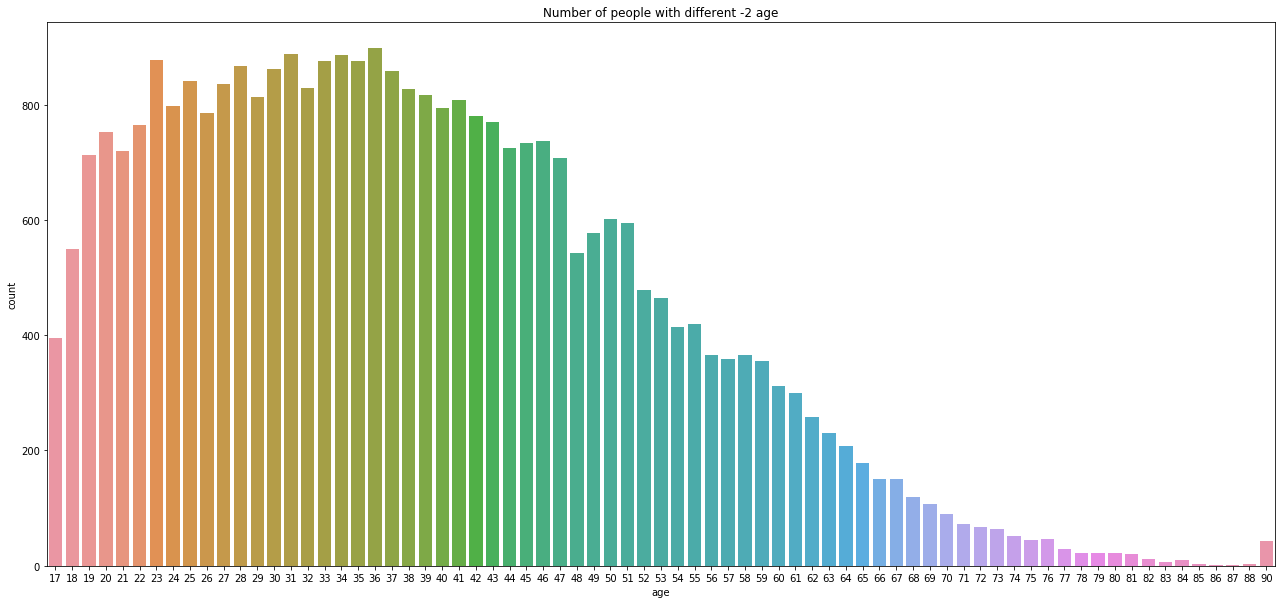

In [28]:
# Checking number of people with different -2 age group.
plt.subplots(figsize=(22,10))
sns.countplot(x='age',data=df_income)
plt.title("Number of people with different -2 age")
plt.show()

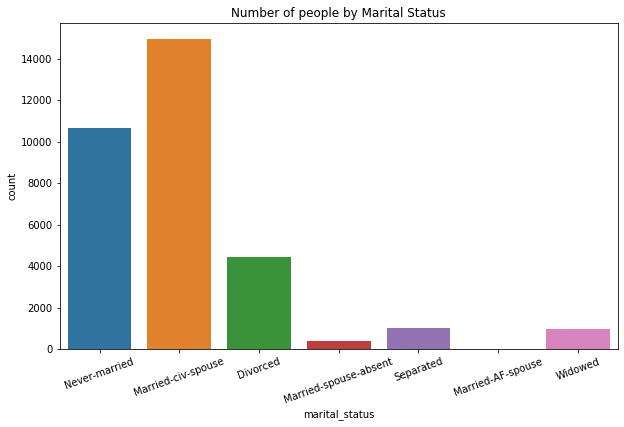

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64


In [29]:
# Marital_Status of people
plt.subplots(figsize=(10,6))
sns.countplot(x='marital_status',data=df_income)
plt.title("Number of people by Marital Status")
plt.xticks(rotation=20)
plt.show()

print(df_income.marital_status.value_counts())

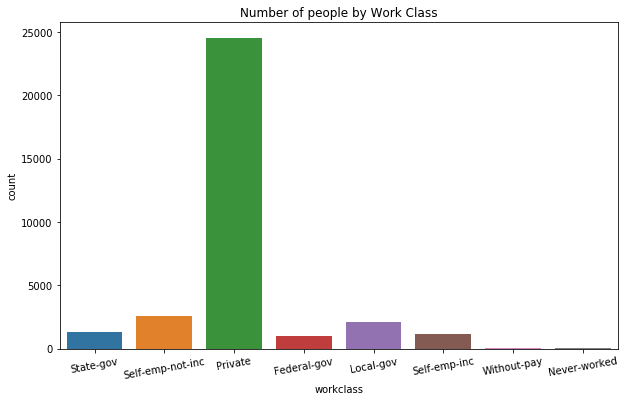

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


In [30]:
# Work_class of people
plt.subplots(figsize=(10,6))
sns.countplot(x='workclass',data=df_income)
plt.title("Number of people by Work Class")
plt.xticks(rotation=10)
plt.show()

print(df_income.workclass.value_counts())

Findings: Above are the work place of peoples.

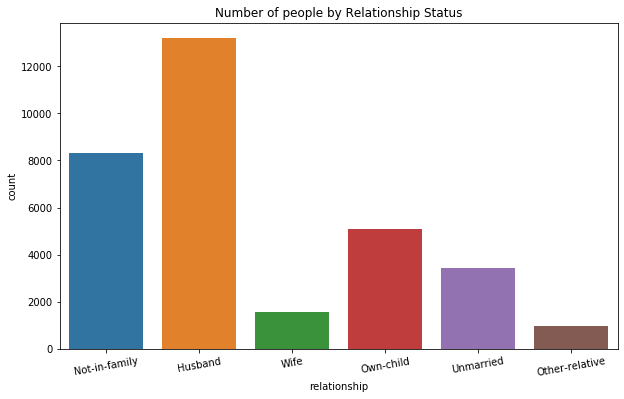

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


In [31]:
# Relationship status of people
plt.subplots(figsize=(10,6))
sns.countplot(x='relationship',data=df_income)
plt.title("Number of people by Relationship Status")
plt.xticks(rotation=10)
plt.show()

print(df_income.relationship.value_counts())

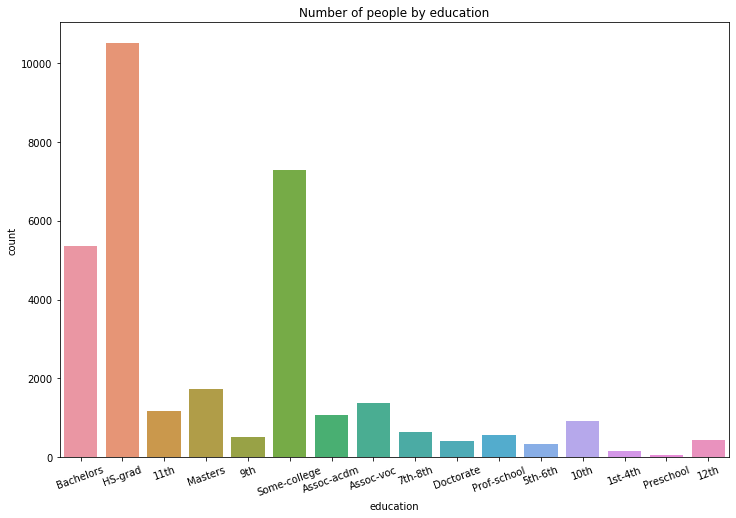

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


In [32]:
# Checking the no. of people by education
plt.subplots(figsize=(12,8))
sns.countplot(x='education',data=df_income)
plt.title("Number of people by education")
plt.xticks(rotation=20)
plt.show()

print(df_income.education.value_counts())

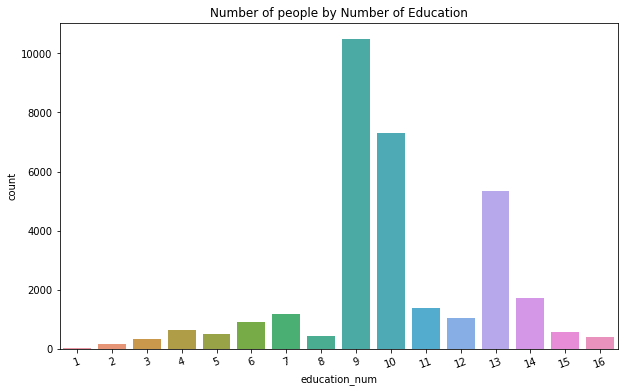

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64


In [33]:
# Checking the no. of people by education number.
plt.subplots(figsize=(10,6))
sns.countplot(x='education_num',data=df_income)
plt.title("Number of people by Number of Education")
plt.xticks(rotation=20)
plt.show()

print(df_income.education_num.value_counts())

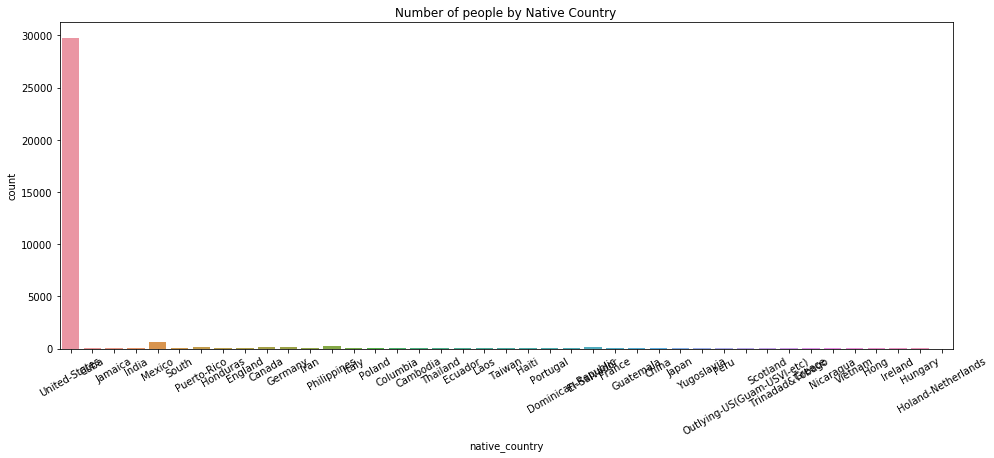

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [34]:
# Checking the no. of people by Native Country
plt.subplots(figsize=(16,6))
sns.countplot(x='native_country',data=df_income)
plt.title("Number of people by Native Country")
plt.xticks(rotation=30)
plt.show()

print(df_income.native_country.value_counts())

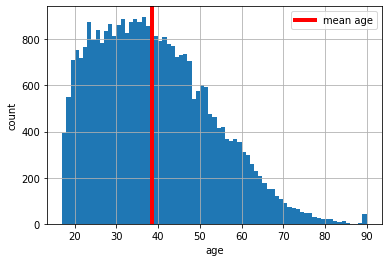

In [35]:
# Checking the mean of age group

ages=df_income['age'].hist(bins=max(df_income['age']-min(df_income['age'])))
mean_val=np.mean(df_income['age'])
plt.axvline(mean_val,linewidth=4, color='red',label='mean age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

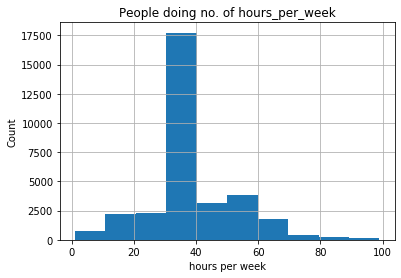

In [36]:
# Checking no. of hours_per_week
df_income['hours_per_week'].hist()
plt.xlabel('hours per week')
plt.ylabel('Count')
plt.title('People doing no. of hours_per_week')
plt.show()

Observation: Approx. 17500 people doing 30 to 40 hours_per_week.

# Bivariate Analysis

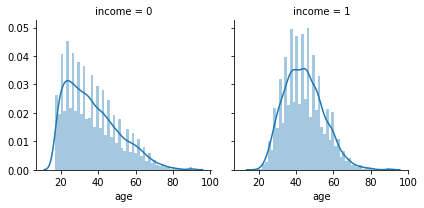

In [37]:
# Exploring age vs Income via facegrid
facet=sns.FacetGrid(df_income,col='income')
facet.map(sns.distplot,"age")
plt.show()

# Sex vs Income

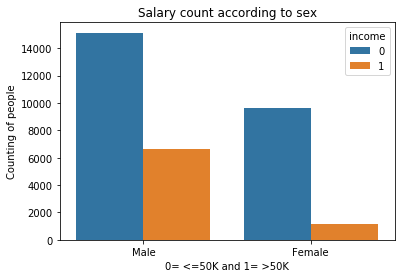

sex     income
Female  0          9592
        1          1179
Male    0         15128
        1          6662
Name: income, dtype: int64


In [38]:
sns.countplot(x="sex",hue="income",data=df_income)
plt.title("Salary count according to sex")
plt.xlabel('0= <=50K and 1= >50K')
plt.ylabel('Counting of people')
plt.show()

print(df_income.groupby('sex')['income'].value_counts())

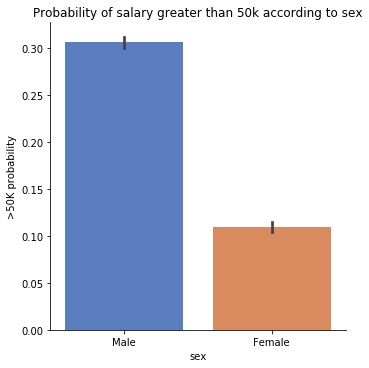

In [40]:
# factor plot of sex vs income
sns.factorplot(x='sex',y='income',data=df_income,kind='bar',size=5,palette='muted',aspect=1)
plt.title('Probability of salary greater than 50k according to sex')
plt.ylabel(">50K probability")
plt.show()

Findings: Only 30% male and 11 % female got salary more than 50K.

# Education vs Income

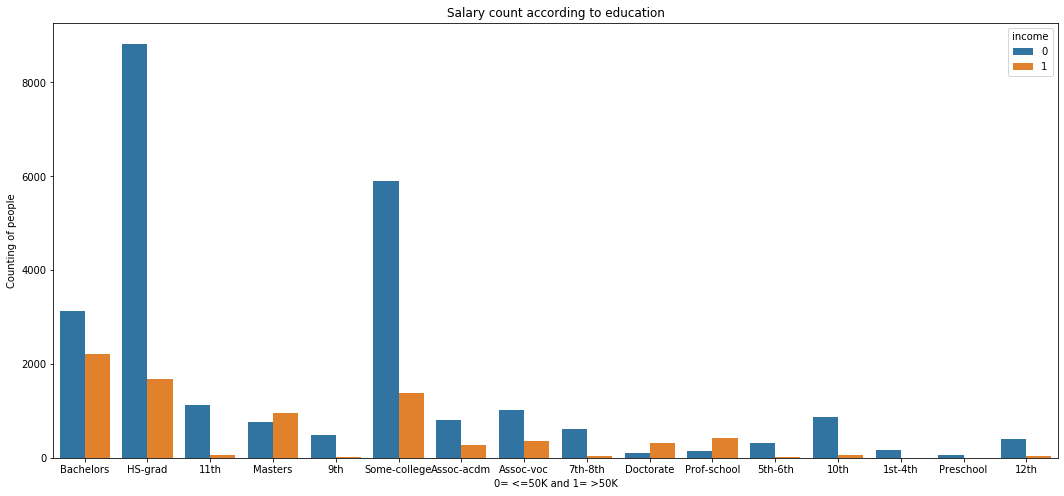

education     income
10th          0          871
              1           62
11th          0         1115
              1           60
12th          0          400
              1           33
1st-4th       0          162
              1            6
5th-6th       0          317
              1           16
7th-8th       0          606
              1           40
9th           0          487
              1           27
Assoc-acdm    0          802
              1          265
Assoc-voc     0         1021
              1          361
Bachelors     0         3134
              1         2221
Doctorate     1          306
              0          107
HS-grad       0         8826
              1         1675
Masters       1          959
              0          764
Preschool     0           51
Prof-school   1          423
              0          153
Some-college  0         5904
              1         1387
Name: income, dtype: int64


In [41]:
plt.subplots(figsize=(18,8))
sns.countplot(x="education",hue="income",data=df_income)
plt.title("Salary count according to education")
plt.xlabel('0= <=50K and 1= >50K')
plt.ylabel('Counting of people')
plt.show()

print(df_income.groupby('education')['income'].value_counts())

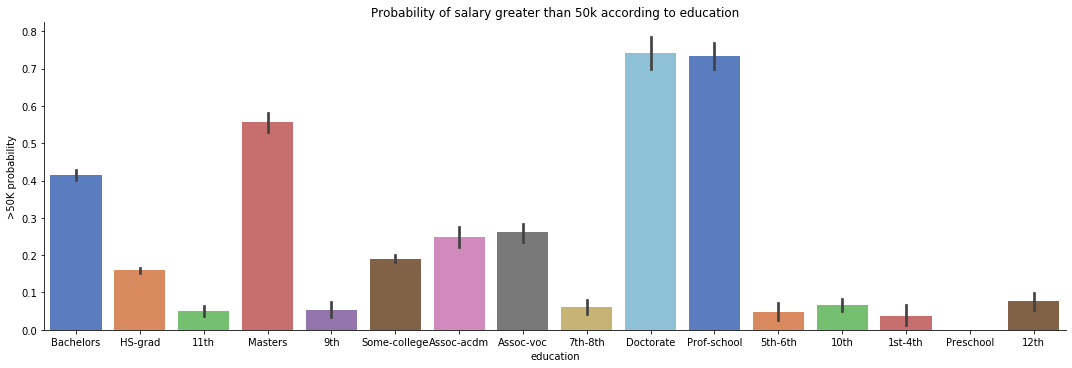

In [42]:
# Factorplot of Education vs Income
sns.factorplot(x='education',y='income',data=df_income,kind='bar',size=5,palette='muted',aspect=3)
plt.title('Probability of salary greater than 50k according to education')
plt.ylabel(">50K probability")
plt.show()

Findings: Approx. 75% Doctorate and Prof-school professional got salary more than 50K.

# Education_Num vs Income

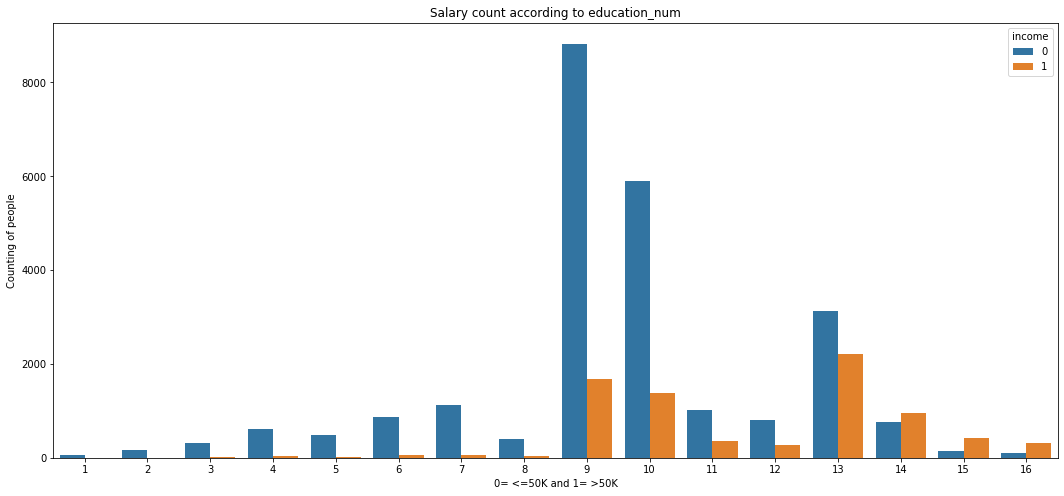

education_num  income
1              0           51
2              0          162
               1            6
3              0          317
               1           16
4              0          606
               1           40
5              0          487
               1           27
6              0          871
               1           62
7              0         1115
               1           60
8              0          400
               1           33
9              0         8826
               1         1675
10             0         5904
               1         1387
11             0         1021
               1          361
12             0          802
               1          265
13             0         3134
               1         2221
14             1          959
               0          764
15             1          423
               0          153
16             1          306
               0          107
Name: income, dtype: int64


In [43]:
plt.subplots(figsize=(18,8))
sns.countplot(x="education_num",hue="income",data=df_income)
plt.title("Salary count according to education_num")
plt.xlabel('0= <=50K and 1= >50K')
plt.ylabel('Counting of people')
plt.show()

print(df_income.groupby('education_num')['income'].value_counts())

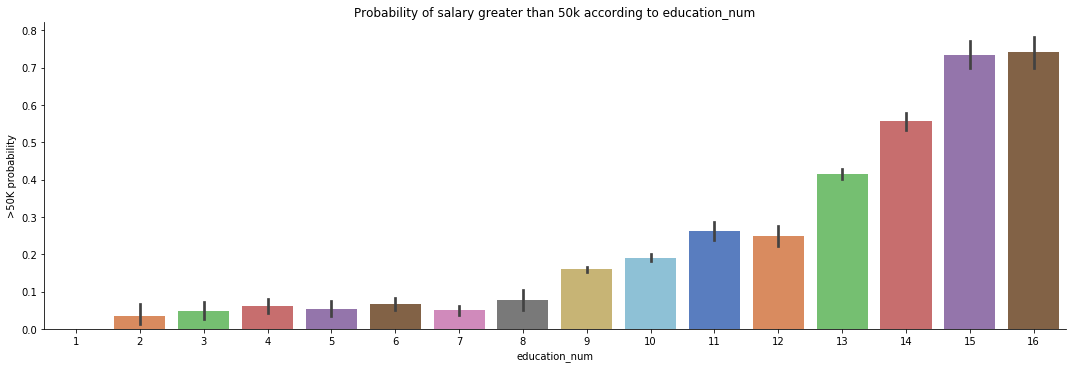

In [44]:
# Factorplot of Education_num vs Income
sns.factorplot(x='education_num',y='income',data=df_income,kind='bar',size=5,palette='muted',aspect=3)
plt.title('Probability of salary greater than 50k according to education_num')
plt.ylabel(">50K probability")
plt.show()

# Relationship vs Income

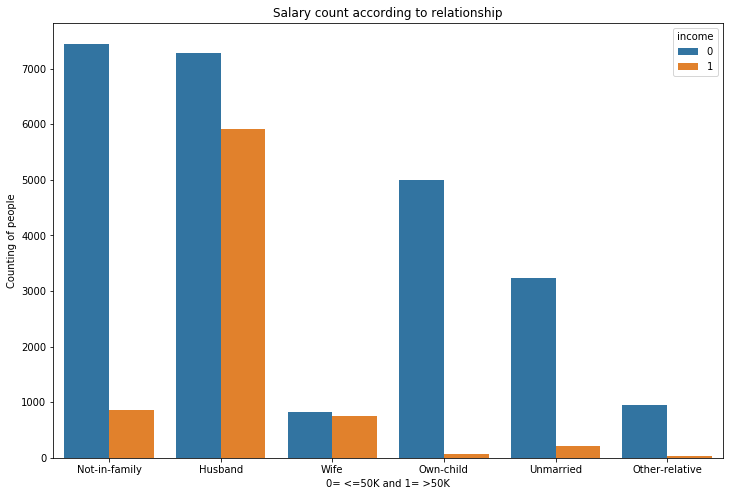

relationship    income
Husband         0         7275
                1         5918
Not-in-family   0         7449
                1          856
Other-relative  0          944
                1           37
Own-child       0         5001
                1           67
Unmarried       0         3228
                1          218
Wife            0          823
                1          745
Name: income, dtype: int64


In [45]:
plt.subplots(figsize=(12,8))
sns.countplot(x="relationship",hue="income",data=df_income)
plt.title("Salary count according to relationship")
plt.xlabel('0= <=50K and 1= >50K')
plt.ylabel('Counting of people')
plt.show()

print(df_income.groupby('relationship')['income'].value_counts())

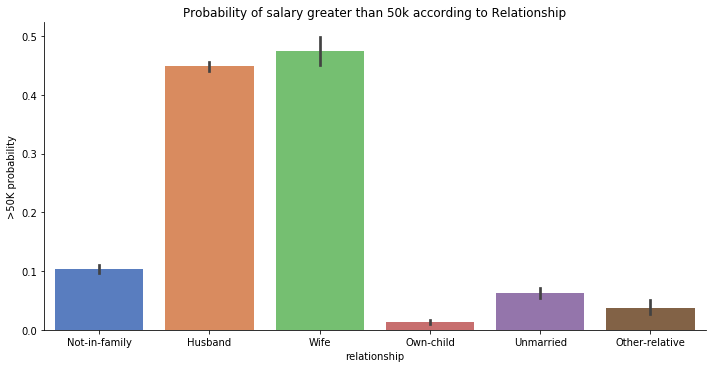

In [46]:
sns.factorplot(x='relationship',y='income',data=df_income,kind='bar',size=5,palette='muted',aspect=2)
plt.title('Probability of salary greater than 50k according to Relationship')
plt.ylabel(">50K probability")
plt.show()

# Workclass vs Income

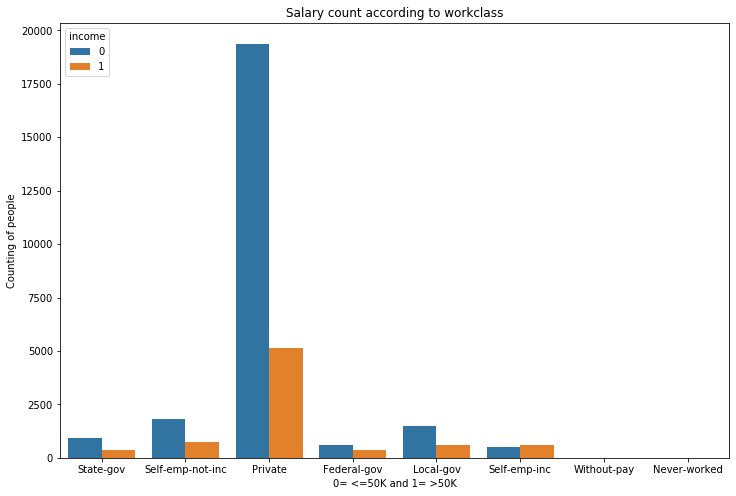

workclass         income
Federal-gov       0           589
                  1           371
Local-gov         0          1476
                  1           617
Never-worked      0             7
Private           0         19378
                  1          5154
Self-emp-inc      1           622
                  0           494
Self-emp-not-inc  0          1817
                  1           724
State-gov         0           945
                  1           353
Without-pay       0            14
Name: income, dtype: int64


In [47]:
plt.subplots(figsize=(12,8))
sns.countplot(x="workclass",hue="income",data=df_income)
plt.title("Salary count according to workclass")
plt.xlabel('0= <=50K and 1= >50K')
plt.ylabel('Counting of people')
plt.show()

print(df_income.groupby('workclass')['income'].value_counts())

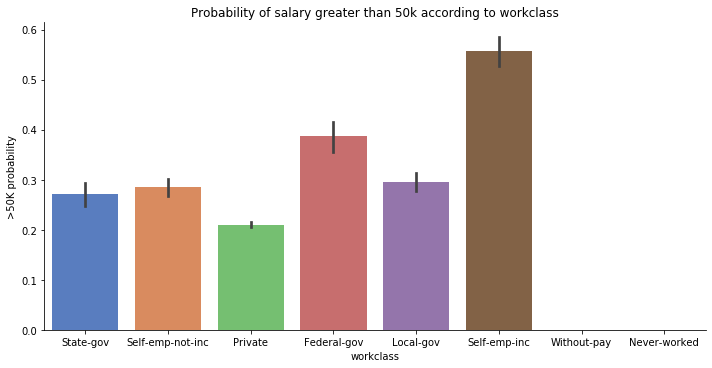

In [48]:
sns.factorplot(x='workclass',y='income',data=df_income,kind='bar',size=5,palette='muted',aspect=2)
plt.title('Probability of salary greater than 50k according to workclass')
plt.ylabel(">50K probability")
plt.show()

# Native country vs Income

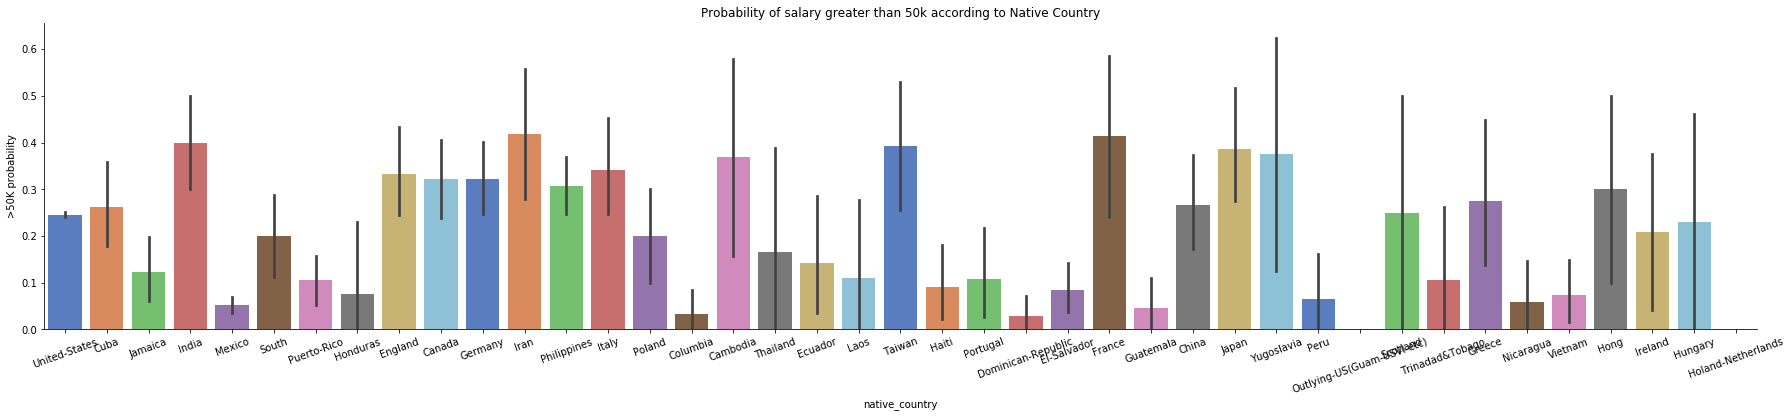

In [49]:
sns.factorplot(x='native_country',y='income',data=df_income,kind='bar',size=5,palette='muted',aspect=5)
plt.title('Probability of salary greater than 50k according to Native Country')
plt.xticks(rotation=20)
plt.ylabel(">50K probability")
plt.show()

# Multivariate Analysis

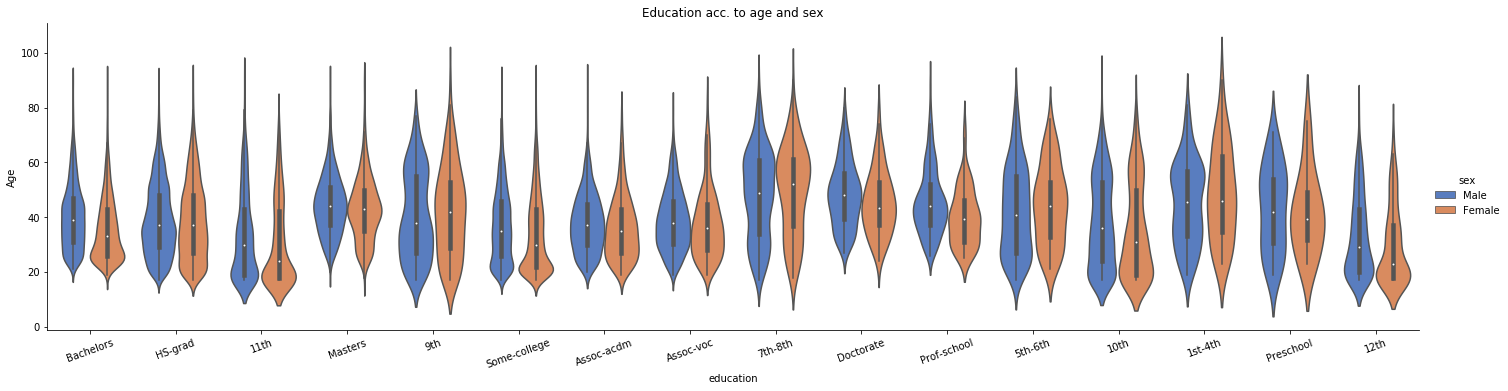

In [50]:
sns.factorplot(x='education',y='age',hue='sex',data=df_income,kind='violin',size=5,palette='muted',aspect=4)
plt.title('Education acc. to age and sex')
plt.xticks(rotation=20)
plt.ylabel("Age")
plt.show()

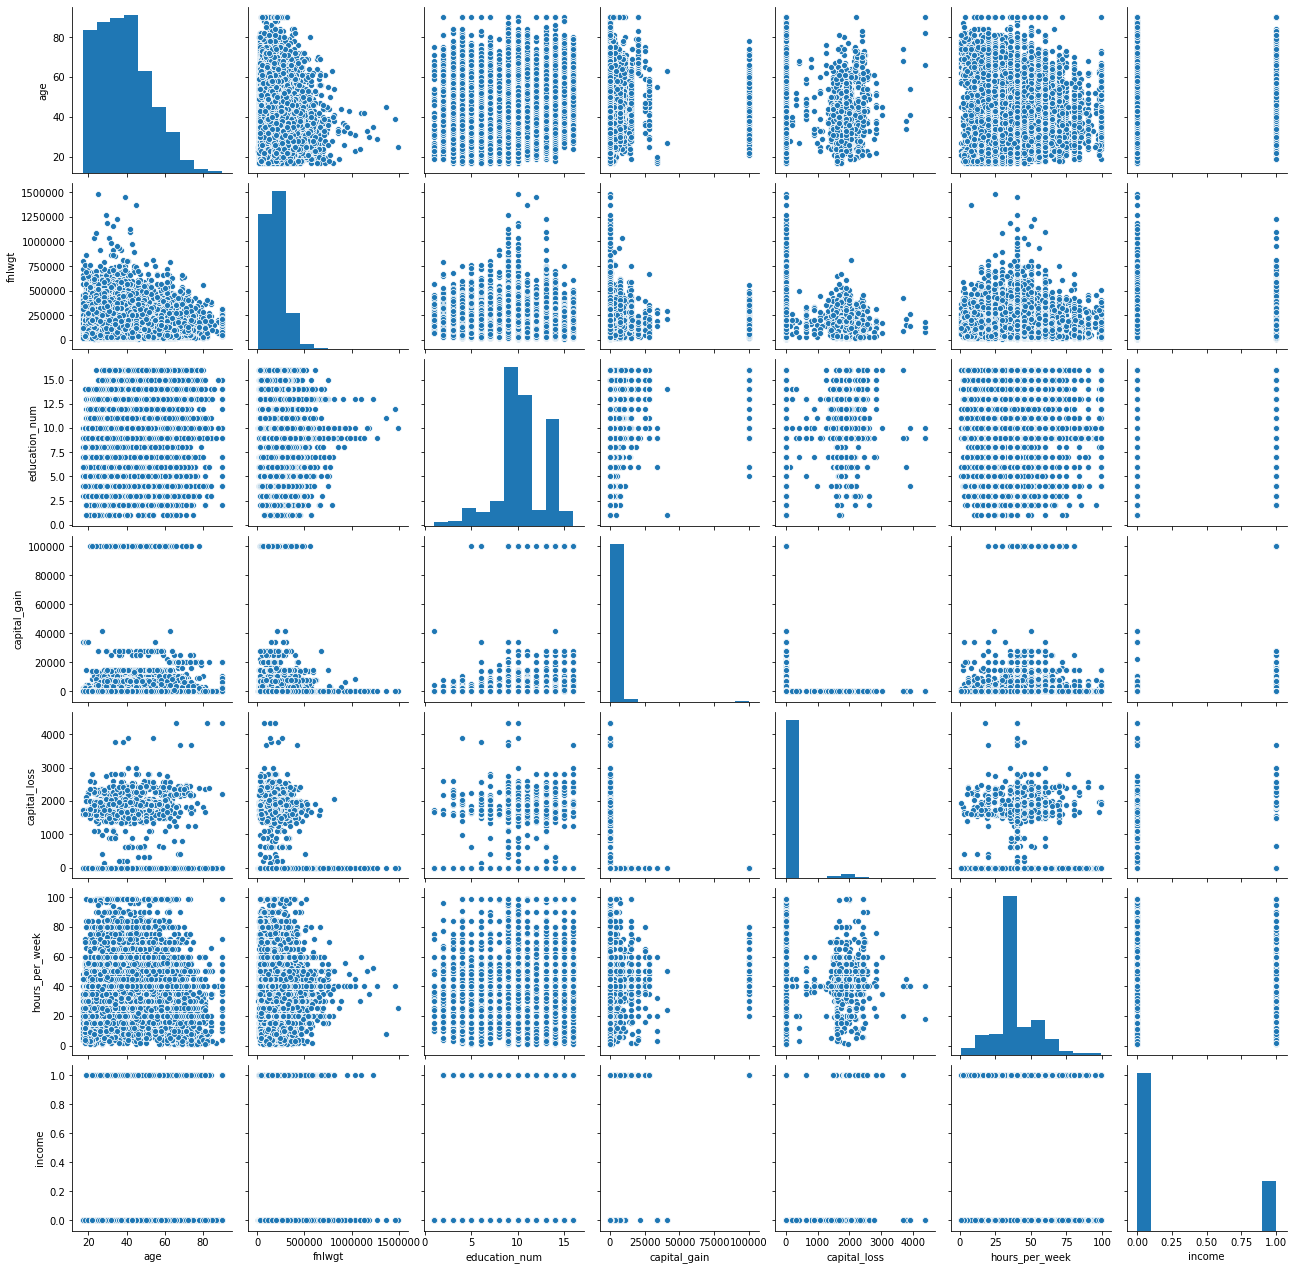

In [53]:
#sns.pairplot(df_income,hue='income')
sns.pairplot(df_income)

# Checking skewness

In [54]:
#Checking the skewness
df_income.skew()

age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
income             1.212430
dtype: float64

In [55]:
# Treating skewness via square root and cube root method.
df_income.skew()
for col in df_income.skew().index:
    if col in df_income.describe().columns:
        if df_income[col].skew()>0.55:
            df_income[col]=np.sqrt(df_income[col])
        if df_income[col].skew()<-0.55:
            df_income[col]=np.cbrt(df_income[col])

In [56]:
#Again checking the skewness.
df_income.skew()

age               0.204327
fnlwgt            0.189115
education_num    -0.311676
capital_gain      5.894582
capital_loss      4.376357
hours_per_week    0.227643
income            1.212430
dtype: float64

In [57]:
# Transform non numeric columns into numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df_income.columns:
    if df_income[column].dtype==np.number:
        continue
    df_income[column]=le.fit_transform(df_income[column])

In [58]:
df_income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,6.244998,6,278.416954,9,12,4,0,1,4,1,46.626173,0.0,39,38,0.0
1,7.071068,5,288.636450,9,12,2,3,0,4,1,0.000000,0.0,12,38,0.0
2,6.164414,3,464.377002,11,8,0,5,1,4,1,0.000000,0.0,39,38,0.0
3,7.280110,3,484.480134,1,6,2,5,0,2,1,0.000000,0.0,39,38,0.0
4,5.291503,3,581.729318,9,12,2,9,5,2,0,0.000000,0.0,39,4,0.0


# Plotting outliers

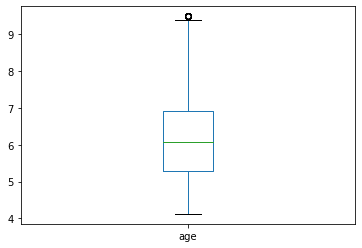

In [59]:
df_income['age'].plot.box()

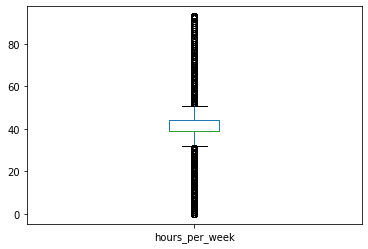

In [60]:
df_income['hours_per_week'].plot.box()

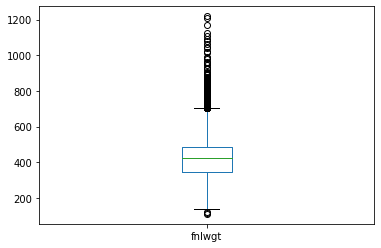

In [61]:
df_income['fnlwgt'].plot.box()

# Removing Outliers

In [62]:
from scipy.stats import zscore
z=np.abs(zscore(df_income))
z

array([[0.11923331, 2.62429763, 1.17386922, ..., 0.03112174, 0.26136999,
        0.56319851],
       [0.8771825 , 1.72109965, 1.08846337, ..., 2.25447498, 0.26136999,
        0.56319851],
       [0.04529456, 0.08529633, 0.38022654, ..., 0.03112174, 0.26136999,
        0.56319851],
       ...,
       [1.37696949, 0.08529633, 0.24338947, ..., 0.03112174, 0.26136999,
        0.56319851],
       [1.30715261, 0.08529633, 0.2506855 , ..., 1.67805007, 0.26136999,
        0.56319851],
       [1.00566949, 0.81790166, 0.98370706, ..., 0.03112174, 0.26136999,
        1.77557289]])

In [63]:
threshold=3
print(np.where(z>3))

(array([    4,     8,    10, ..., 32551, 32553, 32560], dtype=int64), array([13, 10, 12, ...,  8,  8, 10], dtype=int64))


In [64]:
new_income=df_income[(z<3).all(axis=1)]

In [65]:
#Checking the shape
print(df_income.shape,'\t\t',new_income.shape)

(32561, 15) 		 (27562, 15)


In [66]:
df_income=new_income
df_income.shape

(27562, 15)

# Model Training

In [67]:
df_income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,6.244998,6,278.416954,9,12,4,0,1,4,1,46.626173,0.0,39,38,0.0
1,7.071068,5,288.636450,9,12,2,3,0,4,1,0.000000,0.0,12,38,0.0
2,6.164414,3,464.377002,11,8,0,5,1,4,1,0.000000,0.0,39,38,0.0
3,7.280110,3,484.480134,1,6,2,5,0,2,1,0.000000,0.0,39,38,0.0
5,6.082763,3,533.462276,12,13,2,3,5,4,0,0.000000,0.0,39,38,0.0


In [68]:
# Splitting the data into input and output variable.
x=df_income.drop(columns=['income'],axis=1)
x.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,6.244998,6,278.416954,9,12,4,0,1,4,1,46.626173,0.0,39,38
1,7.071068,5,288.636450,9,12,2,3,0,4,1,0.000000,0.0,12,38
2,6.164414,3,464.377002,11,8,0,5,1,4,1,0.000000,0.0,39,38
3,7.280110,3,484.480134,1,6,2,5,0,2,1,0.000000,0.0,39,38
5,6.082763,3,533.462276,12,13,2,3,5,4,0,0.000000,0.0,39,38


In [69]:
y=df_income['income']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
5    0.0
Name: income, dtype: float64

In [70]:
# Checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(27562, 14) 		 (27562,)


In [71]:
# Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [72]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [73]:
#Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(22049, 14) 		 (5513, 14)


In [74]:
#Checking the shape
print(y_train.shape,'\t\t',y_test.shape)

(22049,) 		 (5513,)


In [83]:
# Importing all the model library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

# Finding the best parameters

In [84]:
# using GridSearchCV to find out the best parameter in LogisticRegression
parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [85]:
# Using GridSearchCV to find out the best parameter in KNeighborsClassifier

parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 24}


In [86]:
# Models with its best parameters

LR=LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=24)
SVC=SVC()

In [87]:
# All Algorithm by using for loop

model=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************')
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.8287683656811173
[[4133  213]
 [ 731  436]]
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      4346
         1.0       0.67      0.37      0.48      1167

    accuracy                           0.83      5513
   macro avg       0.76      0.66      0.69      5513
weighted avg       0.81      0.83      0.81      5513

*****************************************************


Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.7781607110466171
[[3444  902]
 [ 321  846]]
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85      4346
   

In [88]:
# Cross validate the models

models=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN]
for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print("Mean Score:",score.mean())
    print("Standard deviation:",score.std())
    print('*************************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score: [0.82299601 0.82227058 0.82910015 0.82510885 0.82365747 0.8320029
 0.81785196 0.8254717  0.82510885 0.82438316]
Mean Score: 0.8247951644922307
Standard deviation: 0.0036113915850333506
*************************************************************


Model: GaussianNB(priors=None, var_smoothing=1e-09)
Score: [0.76967719 0.77801959 0.78664731 0.77322206 0.76269956 0.78447025
 0.77140784 0.7808418  0.79535559 0.79208999]
Mean Score: 0.7794431169531257
Standard deviation: 0.009865558716407303
*************************************************************


Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_s

Above all models Logistic Regression is giving best score.

Now we use some boosting technique to boostup our score.

After that we decide that which model is best

# Using Ensemble Technique to boostup our score

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [90]:
# All algorithm by using for loop

model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('********************************************************************************************************************')
    print('\n')

Accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
0.8519862144023218
[[4058  288]
 [ 528  639]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      4346
         1.0       0.69      0.55      0.61      1167

    accuracy                           0.85      5513
   macro avg       0.79      0.74      0.76      5513
weighted avg       0.84      0.85      0.85      5513

**********************************************************

In [91]:
# Cross validate the boosting models

models=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print("Mean Score:",score.mean())
    print("Standard deviation:",score.std())
    print('*************************************************************')
    print('\n')

Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Score: [0.84040624 0.85201306 0.84833091 0.8490566  0.84470247 0.84796807
 0.85449927 0.84615385 0.85486212 0.84869376]
Mean Score: 0.8486686350037613
Standard deviation: 0.004178739068243684
*************************************************************


Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Score: [0.85201306 0.84874864 0.86502177 0.84869

Gradient Boosting Classifier gives best score and it is not suffering from underfitting and overfitting.

So, we choose Gradient Boosting Classifier as our final model.

In [93]:
#GradientBoostingClassifier with best result
gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=59,n_estimators=200)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)
predgbc=gbc.predict(x_test)
print(accuracy_score(y_test,predgbc))
print(confusion_matrix(y_test,predgbc))
print(classification_report(y_test,predgbc))

0.8657718120805369
[[4126  220]
 [ 520  647]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      4346
         1.0       0.75      0.55      0.64      1167

    accuracy                           0.87      5513
   macro avg       0.82      0.75      0.78      5513
weighted avg       0.86      0.87      0.86      5513



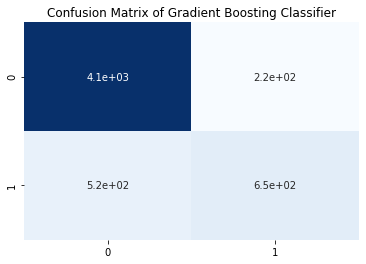

In [94]:
# Plotting Confusion Matrix for Gradient Boosting CLassifier.
cm=confusion_matrix(y_test,predgbc)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')

plt.title("Confusion Matrix of Gradient Boosting Classifier")
plt.show()

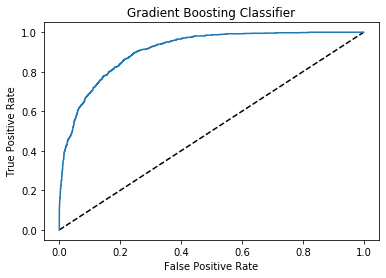

0.7518958819602262


In [95]:
# AUC_ROC Curve and finding AUC score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gbc.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

auc_score=roc_auc_score(y_test,predgbc)
print(auc_score)

In [96]:
# Saving this model
from sklearn.externals import joblib

#saving the model as an object in a file
joblib.dump(gbc,'census_income_data_1994.obj')

['census_income_data_1994.obj']